# Question 5

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import DBSCAN
sns.set_style("darkgrid")
RANDOM_STATE = 123

### Load the dataset (Question 1)  into a DataFrame object

In [2]:
crawled_df = pd.read_csv('Q1_Mudah_PropAds.csv')
crawled_df.head()

,list_title,url,price,area,category,prop_type,prop_title1,prop_title2,bedrooms,bathroom,facilities,size,size_unit
0,New Luxury Freehold Residence 4min Walk to Mid...,https://www.mudah.my/New+Luxury+Freehold+Resid...,597000,Mid Valley City,Apartments,Condo / Services residence / Penthouse / Townh...,Freehold,Non Bumi Lot,1.0,2.0,NaN,689.0,sq.ft.
1,Sri Putramas 1 1100sqft Jalan Kuching Below Ma...,https://www.mudah.my/Sri+Putramas+1+1100sqft+J...,405000,Jalan Kuching,Apartments,Condo / Services residence / Penthouse / Townh...,Freehold,Non Bumi Lot,3.0,2.0,"Swimming Pool, Gymnasium, Tennis Court, Squash...",1100.0,sq.ft.
2,0% DOWNPAYMENT Arena Green 750SF Bukit Jalil [...,https://www.mudah.my/0+DOWNPAYMENT+Arena+Green...,320000,Bukit Jalil,Apartments,Condo / Services residence / Penthouse / Townh...,Freehold,Non Bumi Lot,3.0,2.0,"Mini Market, Playground, Jogging Track, 24 Hou...",878.0,sq.ft.
3,[Duplex Penthouse] Silk Residence Duplex Doubl...,https://www.mudah.my/+Duplex+Penthouse+Silk+Re...,900000,Cheras,Apartments,Condo / Services residence / Penthouse / Townh...,Freehold,Non Bumi Lot,6.0,7.0,"Swimming Pool, Gymnasium, Mini Market, Playgro...",4177.0,sq.ft.
4,BELOW MARKET!! Menara D'Sara Condo Sri Damansa...,https://www.mudah.my/BELOW+MARKET+Menara+D+Sar...,380000,Sri Damansara,Apartments,Condo / Services residence / Penthouse / Townh...,Freehold,Non Bumi Lot,3.0,2.0,"Swimming Pool, Gymnasium, Tennis Court, Squash...",1130.0,sq.ft.


### Visualize the data, use only two of these attributes at the time

Text(0.5, 1.04, 'Price vs Size by Property Category')

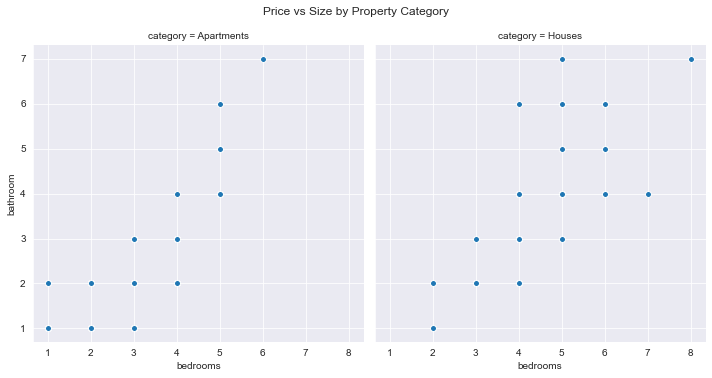

In [3]:
g = sns.FacetGrid(crawled_df[crawled_df['bedrooms']>0], col="category", height=5)
g = g.map(plt.scatter, "bedrooms", "bathroom", edgecolor="w")
g.fig.suptitle('Price vs Size by Property Category', y =1.04)

Text(0.5, 1.04, 'Price vs Size by Property Category')

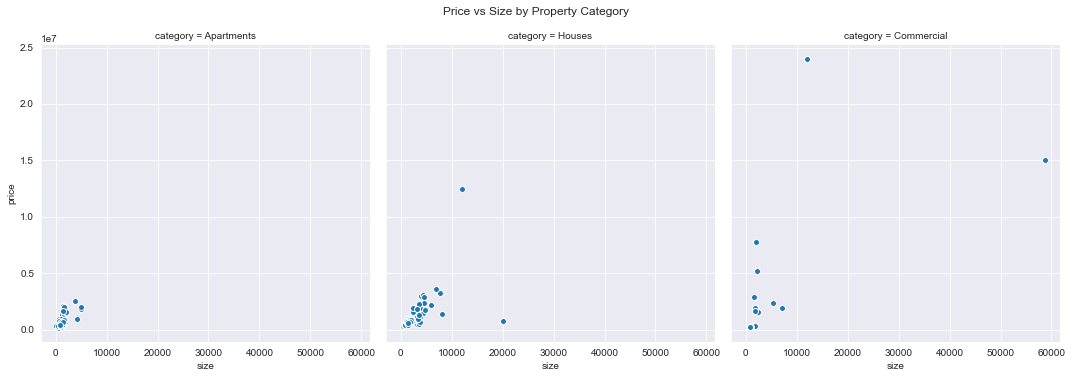

In [4]:
g = sns.FacetGrid(crawled_df[crawled_df['size_unit']=='sq.ft.'], col="category", height=5)
g = g.map(plt.scatter, "size", "price", edgecolor="w")
g.fig.suptitle('Price vs Size by Property Category', y =1.04)

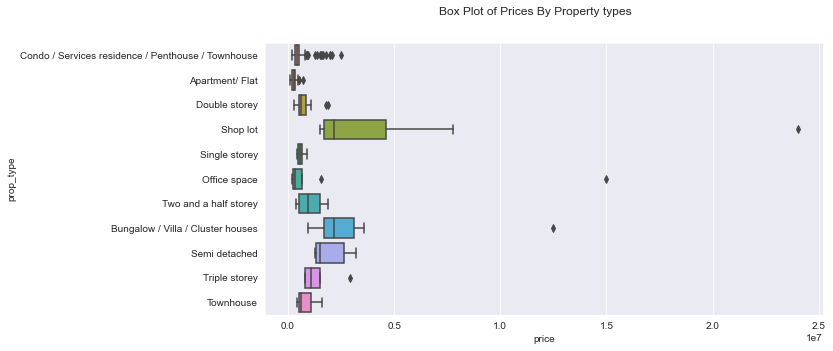

In [5]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="price", y="prop_type", data=crawled_df[crawled_df['size_unit']=='sq.ft.'])
plt.suptitle('Box Plot of Prices By Property types')
plt.show()

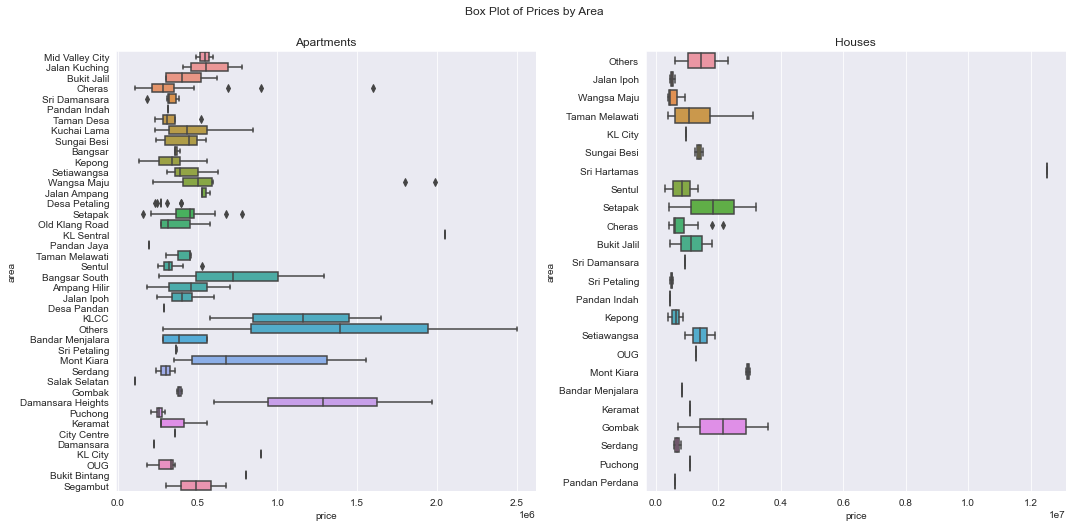

In [6]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.boxplot(x="price", y="area", data=crawled_df[crawled_df['category']=='Apartments'], ax=ax[0])
sns.boxplot(x="price", y="area", data=crawled_df[crawled_df['category']=='Houses'], ax=ax[1])
plt.suptitle('Box Plot of Prices by Area ', y=1.04)
ax[0].set_title('Apartments')
ax[1].set_title('Houses')
fig.tight_layout()
plt.show()

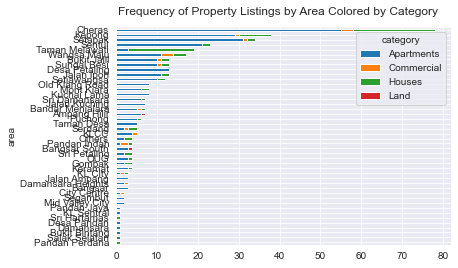

In [7]:
plot_data = crawled_df.pivot_table(index='area', columns='category', values='prop_type', aggfunc='count').fillna(0)
index = plot_data.sum(1).sort_values(ascending=True).index
plot_data.loc[index].plot(kind='barh', stacked=True)
plt.suptitle('Frequency of Property Listings by Area Colored by Category', y =0.95)
plt.show()

### Normalize numerical attributes
There are only 4 numerical columns in our dataset. Normalize them using Standard Scaler normalization

In [8]:
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler

In [9]:
# First winsorize the outliers in price and size data 
crawled_df[['price', 'size']] = mstats.winsorize(crawled_df[['price', 'size']], limits=[0.05, 0.05])

# Normalize using skleran StandardScaler library
scaler = StandardScaler()
crawled_df[['price', 'size', 'bedrooms', 'bathroom']] = scaler.fit_transform(crawled_df[['price', 'size', 'bedrooms', 'bathroom']].fillna(0))

In [10]:
crawled_df[['price', 'size', 'bedrooms', 'bathroom']]

,price,size,bedrooms,bathroom
0,0.133628,-0.274015,-1.812094,-0.184995
1,-0.363670,-0.153477,-0.050642,-0.184995
2,-0.583828,-0.221223,-0.050642,-0.184995
3,0.918428,0.785497,2.591537,4.327069
4,-0.428422,-0.144323,-0.050642,-0.184995
...,...,...,...,...
395,-0.630450,-0.206575,-0.050642,-0.184995
396,-0.285967,-0.061930,-0.050642,-0.184995
397,0.154349,-0.061930,0.830084,1.619831
398,0.219102,-0.068643,-0.050642,-0.184995


### Plot Correlation
Plot Correlation for numerical attributes

In [11]:
corr = crawled_df[['price', 'size', 'bedrooms', 'bathroom']].corr()
display(corr.style.applymap(lambda x: 'background-color: yellow' if x > 0.75 else ''))

,price,size,bedrooms,bathroom
price,1.000000,0.394403,0.216944,0.429050
size,0.394403,1.000000,0.058092,0.133787
bedrooms,0.216944,0.058092,1.000000,0.843032
bathroom,0.429050,0.133787,0.843032,1.000000


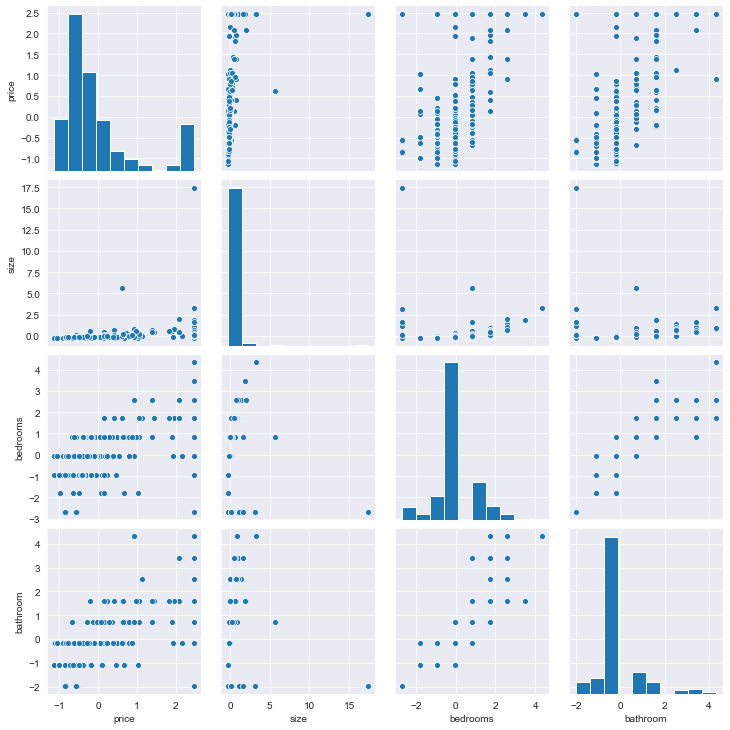

In [12]:
sns.pairplot(crawled_df[['price', 'size', 'bedrooms', 'bathroom']])

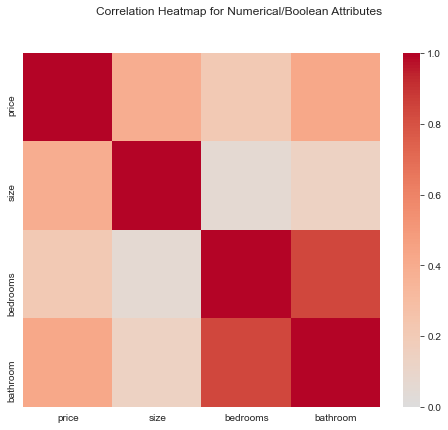

In [13]:
# plot the heatmap
fig, ax = plt.subplots(figsize=(8,6.5))    
sns.heatmap(corr, 
            vmin = 0,
            vmax =1,
            cmap = 'coolwarm',
            center=0,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            ax=ax)
plt.suptitle('Correlation Heatmap for Numerical/Boolean Attributes')
plt.show()

### Construct a density-based clustering model and extract cluster labels and outliers to plot your results. 

In [14]:
dummies = pd.get_dummies(crawled_df[['area', 'category', 'prop_type', 'prop_title1', 'prop_title2', 'size_unit']])
X= pd.concat([crawled_df[['price', 'size', 'bedrooms', 'bathroom']], dummies], axis=1)

In [15]:
# Perform a PCA to reduce dimension to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [16]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

Estimated number of clusters: 4
Estimated number of noise points: 108
Silhouette Coefficient: 0.248


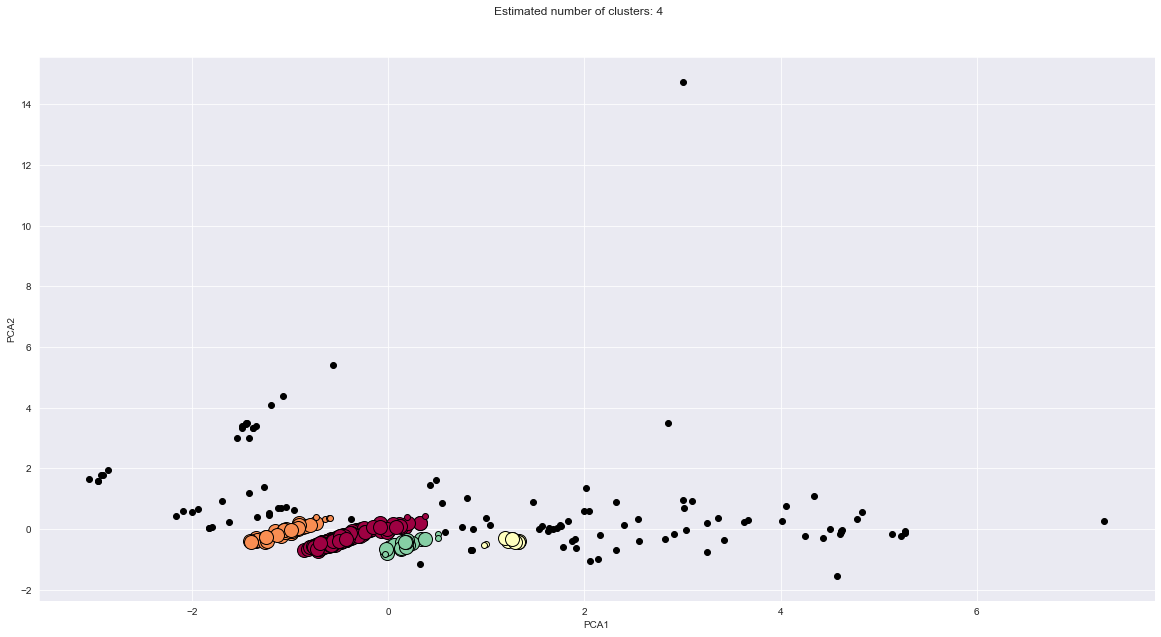

In [22]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result

fig = plt.figure(figsize=(20,10))
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)


plt.xlabel('PCA1')    
plt.ylabel('PCA2')
plt.suptitle('Estimated number of clusters: %d' % n_clusters_, y=0.95)
plt.show()


fig.savefig('DBSCAN.png')